# Project Machine Learning: Operator Seluler Megaline

Project ini merupakan project lanjutan dari Sprint sebelumnya. Dimana Operator Seluler Megaline ingin mengembangkan sebuah model untuk memberikan rekomendasi paket yang tepat dan merekomendasikan salah satu dari dua paket terbaru yang tersedia yaitu Smart dan Ultra. Model tersebut dibuat dengan menggunakan Machine Learning dengan mempelajari perilaku pengguna yang sudah menggunakan paket ini lebih dulu.

Langkah selanjutnya setelah project ini selesai yaitu, operator dapat memberikan rekomendasikan paket yang tepat kepada pengguna setelah paket lamanya habis/kadaluarsa. Setiap pengguna tentu akan mendapatkan rekomendasi yang berbeda-beda sesuai dengan perilakunya.

## Daftar isi

- [Dafar Isi](#Daftar-Isi)
- [Penyiapan Data](#Penyiapan-Data)

    - [Import Library](#Import-Library)
    - [Mempalari dan Memperbaiki Kualitas Data](#Mempalari-dan-Memperbaiki-Kualitas-Data)
    - [Memisahkan data](#Memisahkan-data)

- [Pembelajaran Model](#Pembelajaran-Model)
    - [Decision Tree](#Decision-Tree)
    - [Random Forest](#Random-Forest)
    - [Logistic Regression](#Logistic-Regression)

- [Pengujian Test Dataset](#Pengujian-Test-Dataset)
- [Kesimpulan](#Kesimpulan)

## Penyiapan Data

### Import Library

Library yang digunakan adalah pengolahan data (Pandas), pembuatan data visualization (Matplotlib) dan pembuatan machine learning (Scikit-Learn).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Mempelajari dan Memperbaiki Kualitas Data

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Data sudah yang dimiliki sudah bersih dari nilai kosong, mari kita cek apakah ada data terduplikat.

In [6]:
df.duplicated().sum()

0

Tidak ada data duplikat. Selanjutnya saya ingin mengubah tipe data pada kolom 'Messages' menjadi int. karena jumlah pesan tidak mungkin bernilai setengah.

In [7]:
df['messages'] = df['messages'].astype(int)

In [8]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83,19915.42,0
1,85.0,516.75,56,22696.96,0
2,77.0,467.66,86,21060.45,0
3,106.0,745.53,81,8437.39,1
4,66.0,418.74,1,14502.75,0


Dataset sudah siap digunakan untuk analisa selanjutnya.

### Memisahkan data

Sebelum membangun sebuah model, karena data kita terbatas, maka kita perlu membagi dataset menjadi 3 bagian. Yaitu:
1. Train Dataset, data untuk melatih/training model
2. Validation Dataset, data untuk proses validasi apakah model yang dibuat sudah mencapai target yang diinginkan pada tahap ini dilakukan proses tuning
3. Test Dataset, pengujian akhir model
    
Setelah saya searching di Google berapa nilai Split Ratio yang ideal untuk membuat Machine Learning. Berdasarkan https://www.v7labs.com/blog/train-validation-test-set Tidak ada nilai Split Ratio yang pas untuk berbagai jenis model. Nilai Split Ratio ideal akan bergantung dari banyaknya dimensi/feature, kualitas data, dan lain-lain. Namun Split Ratio yang umum digunakan adalah 80:10:10 , 70:15:15, 60:20:20. Berdasarkan https://www.techtarget.com, ratio 70:20:10 pas untuk dataset kecil. Karena jumlah data yang saya miliki hanya 3214 data maka saya akan menggunakan Split Ratio 70:20:10.

Pertama memisahkan feature dan target dari dataset.

In [9]:
feature = df.drop(['is_ultra'], axis = 1)
target = df['is_ultra']

Selanjutnya, memisahkan feature dan target menjadi 2 bagian yaitu data training dan data temporary dengan komposisi 70:30.

In [10]:
feature_train, feature_temp, target_train, target_temp = train_test_split(feature, target, test_size=0.3, random_state=2412)

Selanjutnya memisahkan feature temp, dan target temp menjadi 2 bagian yaitu data validation dan data test dengan komposisi 2:1

In [11]:
feature_valid, feature_test, target_valid, target_test = train_test_split(feature_temp, target_temp, test_size=0.3334, random_state=2412)

Selanjutnya kita lakukan pengecekan apakah Split Ratio yang dihasilkan sudah sesuai atau belum:

In [12]:
print(f'Size train dataset adalah {round(len(feature_train)/len(feature)*100)}%')
print(f'Size validation dataset adalah {round(len(feature_valid)/len(feature)*100)}%')
print(f'Size test dataset adalah {round(len(feature_test)/len(feature)*100)}%')

Size train dataset adalah 70%
Size validation dataset adalah 20%
Size test dataset adalah 10%


Proses split dataset berjalan dengan baik

## Pembelajaran Model

Model Machine Learning yang dibuat adalah jenis Klasifikasi, karena kita ingin menentukan rekomendasi paket menjadi dua kategori yaitu 1 (Paket Ultra) dan 0 (Paket Smart). Berikut ada beberapa model Machine Learning yang umum digunakan untuk jenis Klasifikasi:
1. Decision Tree
2. Random Forest
3. Logistic Regression

Model dapat dikatakan bekerja dengan baik apabila dapat menghasilkan accuracy diatas 75% pada saat pengujian data validation.

### Decistion Tree

Pada model Machine Learning Decision Tree hyperparameter yang akan saya gunakan dan variasikan adalah max_depth, dan criterion. Max depth divariasikan dari nilai 1 hingga 6 karena jika terlalu besar potensi terjadinya overfitting akan semakin besar. Untuk criterion saya akan memilih yang terbaik antara 'gini' dan 'entropy'.

In [13]:
best_dt_depth = 0
best_dt_accuracy = 0
best_dt_model = None
for depth in range(1,7):
    for crit in ['gini','entropy']:
        model_dt = DecisionTreeClassifier(random_state=2412, max_depth=depth, criterion = crit)
        model_dt.fit(feature_train,target_train)
        prediction_dt_valid = model_dt.predict(feature_valid)
        akurasi = accuracy_score(target_valid, prediction_dt_valid)
        if akurasi > best_dt_accuracy:
            best_dt_depth = depth
            beest_dt_crit = crit
            best_dt_accuracy = akurasi
            best_dt_model = model_dt
print(f'Max_depth terbaik adalah {best_dt_depth} dan criterion terbaik adalah {crit} dengan akurasi dataset test adalah',best_dt_accuracy*100)

Max_depth terbaik adalah 5 dan criterion terbaik adalah entropy dengan akurasi dataset test adalah 79.31570762052877


Model ini sudah menghasilkan accuracy diatas target yaitu 79.3%. Namun kita akan tetap melakukan explorasi untuk model yang lain. Selanjutnya kita akan melihat confussion matrixnya.

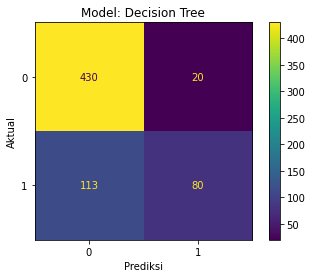

In [14]:
con_dt = confusion_matrix(target_valid, best_dt_model.predict(feature_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=con_dt)
disp.plot()
plt.title('Model: Decision Tree')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Selanjutnya yaitu menghitung nilai akurasi, presisi, recall, dan f1 dari model ini.

In [15]:
print(f'Akurasi yang didapatkan adalah {accuracy_score(target_valid, best_dt_model.predict(feature_valid))*100}')
print(f'Presisi yang didapatkan adalah {precision_score(target_valid, best_dt_model.predict(feature_valid))*100}')
print(f'Recall yang didapatkan adalah {recall_score(target_valid, best_dt_model.predict(feature_valid))*100}')
print(f'Nilai F1 yang didapatkan adalah {f1_score(target_valid, best_dt_model.predict(feature_valid))*100}')

Akurasi yang didapatkan adalah 79.31570762052877
Presisi yang didapatkan adalah 80.0
Recall yang didapatkan adalah 41.45077720207254
Nilai F1 yang didapatkan adalah 54.60750853242321


Mari kita cek apakah terjadi overfitting atau underfitting dari model ini.

In [16]:
print(f'Akurasi yang didapatkan adalah {accuracy_score(target_train, best_dt_model.predict(feature_train))*100}')
print(f'Presisi yang didapatkan adalah {precision_score(target_train, best_dt_model.predict(feature_train))*100}')
print(f'Recall yang didapatkan adalah {recall_score(target_train, best_dt_model.predict(feature_train))*100}')
print(f'Nilai F1 yang didapatkan adalah {f1_score(target_train, best_dt_model.predict(feature_train))*100}')

Akurasi yang didapatkan adalah 81.68074699866608
Presisi yang didapatkan adalah 90.633608815427
Recall yang didapatkan adalah 46.53465346534654
Nilai F1 yang didapatkan adalah 61.49532710280374


Tidak terjadi overfitting karena nilai akurasi dari train test tidak jauh berbeda dari validation test.

Saya menemukan cara cepat dengan menggunakan chatGPT untuk proses trial & error mencari model terbaik dengan menggunakan parameter grid. Mari kita coba apakah hasilnya akan sama atau tidak.

In [17]:
param_grid = {
    'max_depth': [1,2,3,4,5,6],  
    'criterion':['entropy','gini'],
    'random_state':[2412]
}

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid)
grid_search.fit(feature_train, target_train)

# Get the best hyperparameter configuration and its corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best hyperparameters on the validation set
best_model = grid_search.best_estimator_
val_accuracy = accuracy_score(target_valid, best_model.predict(feature_valid))

print("Validation Accuracy:", val_accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'random_state': 2412}
Best Score: 0.7914704281118534
Validation Accuracy: 0.7838258164852255


In [18]:
print(f'Akurasi yang didapatkan adalah {accuracy_score(target_valid, best_model.predict(feature_valid))*100}')
print(f'Presisi yang didapatkan adalah {precision_score(target_valid, best_model.predict(feature_valid))*100}')
print(f'Recall yang didapatkan adalah {recall_score(target_valid, best_model.predict(feature_valid))*100}')
print(f'Nilai F1 yang didapatkan adalah {f1_score(target_valid, best_model.predict(feature_valid))*100}')

Akurasi yang didapatkan adalah 78.38258164852256
Presisi yang didapatkan adalah 73.68421052631578
Recall yang didapatkan adalah 43.523316062176164
Nilai F1 yang didapatkan adalah 54.72312703583062


Hasilnya berbeda dengan metode for-loop. Mungkin pada metode ini, yang menjadi pertimbangan tidak hanya nilai Accuracy-nya saja tapi nilai overal dari akurasi, presisi, recall, dan f1. Selanjutnya saya akan menggunakan metode for-loops saja.

### Random Forest

Pemodelan Random Forest menggunakan Hyperparameter random_state, max_depth dan n_estimators. Metode ini mempertimbangan hasil dari lebih dari satu pohon, sehingga hasilnya akan minim akan overfitting. Berbeda dari decision tree yang hanya memiliki satu pohon saja.

Nilai n_estimators akan divariasikan dari 5 hingga 300 dengan kelipatan 5, dengan nilai max_dept dari 1 hingga 6, serta criterion 'gini' atau 'entropy'.

In [19]:
best_rt_model = None
best_rf_accuracy = 0
best_nt = 0
best_rf_depth = 0
best_rf_crit = None
for nt in range(5,300,30):
    for depth in range(1,7):
        for crit in ['gini','entropy']:
            model_rf = RandomForestClassifier(random_state = 2412, criterion=crit, n_estimators = nt, max_depth = depth)
            model_rf.fit(feature_train, target_train)
            predictions_rf_valid = model_rf.predict(feature_valid)
            akurasi = accuracy_score(target_valid, predictions_rf_valid)
            if akurasi > best_rf_accuracy:
                best_rf_model = model_rf
                best_rf_accuracy = akurasi
                best_rt_nt = nt
                best_rf_depth = depth
                best_rf_crit = crit
                

In [20]:
print(f'max depth terbaik adalah ', best_rf_depth)
print(f'criterion terbaik adalah ', best_rf_crit)
print(f'n_estimators terbaik adalah ', best_rt_nt)
print(f'akurasi yang diperoleh adalah',best_rf_accuracy*100)

max depth terbaik adalah  6
criterion terbaik adalah  gini
n_estimators terbaik adalah  35
akurasi yang diperoleh adalah 81.02643856920683


Mari kita lihat confussion matrixnya

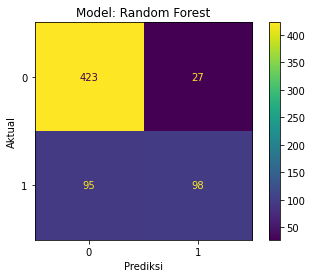

In [44]:
con_rf = confusion_matrix(target_valid, best_rf_model.predict(feature_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=con_rf)
disp.plot()
plt.title('Model: Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [22]:
print(f'Akurasi yang didapatkan adalah {accuracy_score(target_valid, best_rf_model.predict(feature_valid))*100}')
print(f'Presisi yang didapatkan adalah {precision_score(target_valid, best_rf_model.predict(feature_valid))*100}')
print(f'Recall yang didapatkan adalah {recall_score(target_valid, best_rf_model.predict(feature_valid))*100}')
print(f'Nilai F1 yang didapatkan adalah {f1_score(target_valid, best_rf_model.predict(feature_valid))*100}')

Akurasi yang didapatkan adalah 81.02643856920683
Presisi yang didapatkan adalah 78.4
Recall yang didapatkan adalah 50.77720207253886
Nilai F1 yang didapatkan adalah 61.63522012578617


Terjadi peningkatan kualitas prediksi dari model Decision Tree sebelumnya yaitu 81.02%. Apakah terjadi overfitting, mari kita cek akurasi train test nya.

In [23]:
print(f'Akurasi yang didapatkan adalah {accuracy_score(target_train, best_rf_model.predict(feature_train))*100}')
print(f'Presisi yang didapatkan adalah {precision_score(target_train, best_rf_model.predict(feature_train))*100}')
print(f'Recall yang didapatkan adalah {recall_score(target_train, best_rf_model.predict(feature_train))*100}')
print(f'Nilai F1 yang didapatkan adalah {f1_score(target_train, best_rf_model.predict(feature_train))*100}')

Akurasi yang didapatkan adalah 83.28145842596709
Presisi yang didapatkan adalah 89.31116389548693
Recall yang didapatkan adalah 53.18246110325319
Nilai F1 yang didapatkan adalah 66.66666666666667


Nilai akurasi data train lebih tinggi namun tidak berbeda jauh dari data validation. Sehingga dapat dikatakan model sudah berjalan dengan baik tanpa adanya overfitting atau underfitting.

### Logistic Regression

Jenis model terakhir yang akan kita uji adalah Logistic Regression. Pada model ini, hyperparameter yang digunakan adalah jumlah maksimum iterasi dan solver yang digunakan. Berikut adalah metode solver yang dapat digunakan:
1. "liblinear" : Cocok untuk dataset dengan ukuran small - medium.
2. "lbfgs" : Cocok untuk dataset ukuran  kecil = medium. Performa lambat untuk data besar, dan kurang bagus untuk data dengan banyak feature.
3. "newton-cg" : Cocok untuk dataset besar, namun lambat.
4. "sag" : Cocok untuk dataset besar, lambat untuk dataset kecil - medium
5. "saga" : Eficient untuk dataset besar, lambat untuk dataset kecil. Namun bagus untuk kompleksitar besar.

Berdasarkan kelebihan dan kekurangan yang dimiliki masing-masing solver. Saya akan mencoba solver "liblnear" , "lbfgs", dan "saga". Liblinear merupakan solver paling umum digunakan, karena feature di dataset yang dimiliki sedikit mungkin solver lbfgs dapat menghasilkan prediksi yang baik, supaya jumlah model yang diuji ganjil saya pilih solver saga untuk meramaikan pertarungan!.

Jumlah maksimum iterasi akan saya set tetap di 500 iterasi.

In [34]:
best_lr_model = None
best_lr_accuracy = 0
best_lr = 0
best_lr_solver = None
akurasi = 0
for  solv in ["liblinear", "lbfgs", "saga"]:
    model_lr = LogisticRegression(max_iter = 5000, solver = solv, random_state = 2412)
    model_lr.fit(feature_train,target_train)
    prediction_lr_valid = model_lr.predict(feature_valid)
    akurasi = accuracy_score(target_valid, prediction_lr_valid)
    print(akurasi, solv)
    if akurasi > best_lr_accuracy:
        best_lr_solver = solv
        best_lr_accuracy = akurasi
        best_lr_model = model_lr
print(f'Solver terbaik adalah {best_lr_solver} dengan akurasi dataset test adalah',best_lr_accuracy*100)

0.7356143079315708 liblinear
0.7465007776049767 lbfgs
0.7107309486780715 saga
Solver terbaik adalah lbfgs dengan akurasi dataset test adalah 74.65007776049767


Solver terbaik untuk kasus ini adalah menggunakan "lbfgs". Sesuai dengan prediksi sebelumnya, bahwa dataset yang dimiliki memiliki feature yang sedikit sehingga tingkat kompleksitasnya rendah dimana model lbfgs unggul untuk kasus tersebut.

Mari kita lihat confussion matrix-nya:

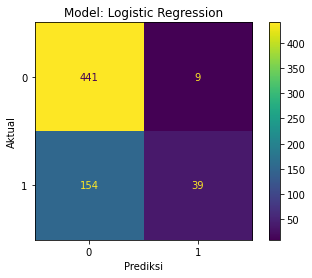

In [35]:
con_lr = confusion_matrix(target_valid, best_lr_model.predict(feature_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=con_lr)
disp.plot()
plt.title('Model: Logistic Regression')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Dilihat dari hasilnya, model kita lebih banyak memprediksi nilai akhir bernilai 0 dibandingkan 1. Apakah terjadi underfitting?

In [37]:
print(f'Akurasi yang didapatkan adalah {accuracy_score(target_valid, best_lr_model.predict(feature_valid))*100}')
print(f'Presisi yang didapatkan adalah {precision_score(target_valid, best_lr_model.predict(feature_valid))*100}')
print(f'Recall yang didapatkan adalah {recall_score(target_valid, best_lr_model.predict(feature_valid))*100}')
print(f'Nilai F1 yang didapatkan adalah {f1_score(target_valid, best_lr_model.predict(feature_valid))*100}')

Akurasi yang didapatkan adalah 74.65007776049767
Presisi yang didapatkan adalah 81.25
Recall yang didapatkan adalah 20.207253886010363
Nilai F1 yang didapatkan adalah 32.365145228215766


In [38]:
print(f'Akurasi yang didapatkan adalah {accuracy_score(target_train, best_lr_model.predict(feature_train))*100}')
print(f'Presisi yang didapatkan adalah {precision_score(target_train, best_lr_model.predict(feature_train))*100}')
print(f'Recall yang didapatkan adalah {recall_score(target_train, best_lr_model.predict(feature_train))*100}')
print(f'Nilai F1 yang didapatkan adalah {f1_score(target_train, best_lr_model.predict(feature_train))*100}')

Akurasi yang didapatkan adalah 74.16629613161405
Presisi yang didapatkan adalah 81.81818181818183
Recall yang didapatkan adalah 22.913719943422915
Nilai F1 yang didapatkan adalah 35.80110497237569


Berdasarkan hasil di atas, selain memang akurasinya kecil. Nilai F-1 dari model ini juga rendah dimana hanya bernilai 32.36 saja dibandingkan dengan model klasifikasi sebelumnya. Rendahnya nilai F-1 menunjukan model tidak mampu mengklasifikasikan data dengan benar. Artinya performa dengan model Linear Regression memang tidak terlalu bagus untuk diaplikasikan untuk dataset ini.

## Pengujian Test Dataset

Setelah menguji 3 model Machine Learning klasifikasi, didapatkan model terbaik yang dipilih yaitu RandomForest dengan hyperparameter max_depth bernilai 6, n_estimators bernilai 35, dan criterion yang digunakan adalah gini.

In [39]:
best_rf_model

RandomForestClassifier(max_depth=6, n_estimators=35, random_state=2412)

In [41]:
best_rf_model.fit(feature_train, target_train)
predictions_rf_test = model_rf.predict(feature_test)
akurasi = accuracy_score(target_test, predictions_rf_test)
presisi = precision_score(target_test, predictions_rf_test)
recall = recall_score(target_test, predictions_rf_test)
nilai_f1 = f1_score(target_test, predictions_rf_test)

In [42]:
print('Dari pemodelan yang digunakan, Random Forest yang dipilih menjadi yang terbaik, dengan detail sebagai berikut:')
print(f'Akurasi yang didapatkan adalah {akurasi}')
print(f'Presisi yang didapatkan adalah {presisi}')
print(f'Recall yang didapatkan adalah {recall}')
print(f'Nilai F1 yang didapatkan adalah {nilai_f1}')

Dari pemodelan yang digunakan, Random Forest yang dipilih menjadi yang terbaik, dengan detail sebagai berikut:
Akurasi yang didapatkan adalah 0.8291925465838509
Presisi yang didapatkan adalah 0.75
Recall yang didapatkan adalah 0.5294117647058824
Nilai F1 yang didapatkan adalah 0.6206896551724139


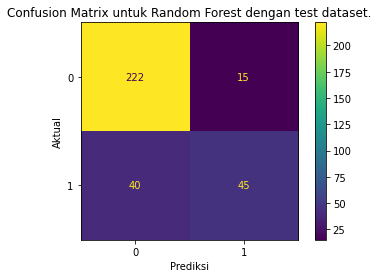

In [43]:
cm_best_rf = confusion_matrix(target_test, predictions_rf_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf)
disp.plot()
plt.title('Confusion Matrix untuk Random Forest dengan test dataset.')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Hasil yang diperoleh sangat baik dimana akurasi yang didapat melebihi akurasi yang diperoleh ketika menguji data validation namun masih dibawah akurasi yang diperoleh saat menguji data training. Yang artinya, model kita memang tidak mengalami overfitting maupun underfitting. Selain itu, nilai F-1 nya juga masih dipertahankan dinilai 0.61-0.62 sehingga dapat dikatakan performa dari model ini sudah bagus.

## Kesimpulan

Kesimpulan yang diperoleh dari project ini adalah sebagai berikut:

1. Urutan model dari yang terbaik untuk memprediksi paket yang cocok berdasarkan kebiasaan pengguna adalah Random Forest, Decision Tree, dan Logistic Regression.
2. Model klasifikasi Random Forest dan Decisiton Tree mampu memberikan akurasi di atas 75%, sedangkan Logistic Regression hanya memberikan akurasi 75%. Itupun dengan nilai F-1 yang rendah.
3. Model Random Forest merupakan model terbaik selanjutnya dapat digunkan oleh perusahaan untuk memberikan rekomendasi kepada pelanggannya, diantara paket Smart dan Ultra, paket yang mana yang sesuai dengan kebiasaan si pelanggan.
4. Nilai akurasi yang dihasilkan untuk pengujian training, validation, dan test berturut-turut sebesar 83.3%, 81.0%, dan 82.9%.
5. Untuk implementasinya, model ini tetap perlu dievaluasi kinerjanya. Apakah dalam 1-2 bulan dari diberlakukannya project ini. Terjadinya perpindahan atau peningkatan penggunaan dari masing-masing Paket atau tidak dan apakah pelanggan yang berpindah memang sesuai dengan rekomendasi yang diberikan atau tidak.